In [19]:
import pandas as pd
import torch
import re
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, balanced_accuracy_score
pd.set_option('display.max_rows', 500)

# Test set results regression

In [139]:
results_reg = pd.read_csv('/data/kpusteln/Fetal-RL/test_data/results_reg_two_models_test.csv')
gt_data = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_test.csv')
gt_data_new = pd.DataFrame()
gt_data_new['index'] = gt_data['index']
gt_data_new['gt_measure'] = gt_data['measure']
data_merged = pd.merge(results_reg, gt_data_new, on='index', how='left')
data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]

In [140]:
data_merged

,index,video,measures,gt_measure,type
0,1_1_13,1_1,17.912975,20.19,1
1,1_1_23,1_1,18.377446,20.19,1
2,1_1_24,1_1,18.385447,20.19,1
3,1_1_25,1_1,18.410865,20.19,1
4,1_1_26,1_1,18.422236,20.19,1
...,...,...,...,...,...
4236,688_3_49,688_3,4.941322,5.13,3
4237,688_3_50,688_3,4.926683,5.13,3
4238,688_3_51,688_3,4.943198,5.13,3
4239,699_3_176,699_3,5.098561,5.15,3


In [141]:
data_merged['type'] = data_merged['video'].str.split('_', expand=True).iloc[:, 1]
data_merged_grouped = data_merged.groupby('video', as_index=False).mean()
data_merged_grouped['type'] = data_merged_grouped['video'].str.split('_', expand=True).iloc[:, 1]

# per class
data_femur = data_merged_grouped[data_merged_grouped['type'] == '3']
data_head = data_merged_grouped[data_merged_grouped['type'] == '1']
data_abdomen = data_merged_grouped[data_merged_grouped['type'] == '2']



In [142]:
data_femur

,video,measures,gt_measure,type
0,112_3,3.028816,3.37,3
4,126_3,2.986336,2.95,3
5,130_3,3.093793,2.75,3
6,135_3,4.222304,4.44,3
7,137_3,6.187977,6.13,3
8,141_3,3.303050,2.61,3
9,153_3,3.445700,3.83,3
10,163_3,3.571488,3.21,3
11,185_3,4.582649,4.72,3
12,186_3,4.316260,4.40,3


In [143]:
print('MAE', mean_absolute_percentage_error(data_femur['gt_measure'], data_femur['measures']))
print('RMSE', mean_squared_error(data_femur['gt_measure'], data_femur['measures'], squared=False))
print('MAPE', mean_absolute_error(data_femur['gt_measure'], data_femur['measures']))

MAE 0.04635212711442501
RMSE 0.26321143194636654
MAPE 0.20061725665072538


In [144]:
data_abdomen

,video,measures,gt_measure,type
3,126_2,14.468736,12.86,2
31,29_2,20.398741,20.82,2
42,39_2,26.930304,28.45,2
48,484_2,4.111499,19.17,2
51,495_2,17.448423,17.39,2
55,535_2,18.041521,17.59,2
71,674_2,4.887397,21.56,2
73,68_2,11.769169,11.68,2
74,692_2,20.120240,21.25,2


In [145]:
print('MAE', mean_absolute_percentage_error(data_abdomen['gt_measure'], data_abdomen['measures']))
print('RMSE', mean_squared_error(data_abdomen['gt_measure'], data_abdomen['measures'], squared=False))
print('MAPE', mean_absolute_error(data_abdomen['gt_measure'], data_abdomen['measures']))

MAE 0.20526780994666127
RMSE 7.537319709173787
MAPE 4.112185366857097


In [146]:
data_head

,video,measures,gt_measure,type
1,117_1,19.859516,19.85,1
2,123_1,18.034299,17.98,1
14,1_1,18.351954,20.19,1
28,27_1,14.071474,14.92,1
34,31_1,19.496624,19.68,1
69,64_1,22.051835,24.53,1
78,80_1,24.592137,25.53,1


In [147]:
print('MAE', mean_absolute_percentage_error(data_head['gt_measure'], data_head['measures']))
print('RMSE', mean_squared_error(data_head['gt_measure'], data_head['measures'], squared=False))
print('MAPE', mean_absolute_error(data_head['gt_measure'], data_head['measures']))

MAE 0.042641148761771934
RMSE 1.2624220424704118
MAPE 0.9071130669522264


In [148]:
results_reg = pd.read_csv('/data/kpusteln/Fetal-RL/test_data/results_reg_two_models.csv')

In [149]:
results_reg

,index,video,measures
0,755_3_164,755_3,4.054358
1,755_3_163,755_3,4.060579
2,755_3_162,755_3,4.078693
3,755_3_165,755_3,4.055991
4,755_3_117,755_3,4.174324
...,...,...,...
2621,931_2_45,931_2,15.599774
2622,931_2_94,931_2,15.998894
2623,931_2_93,931_2,15.936091
2624,931_1_24,931_1,16.352591


In [150]:
results_reg['type'] = results_reg['video'].str.split('_', expand=True).iloc[:, 1]
data_merged_grouped = results_reg.groupby('video', as_index=False).mean()
data_merged_grouped['type'] = data_merged_grouped['video'].str.split('_', expand=True).iloc[:, 1]
data_merged_grouped['id'] = data_merged_grouped['video'].str.split('_', expand=True).iloc[:, 0]
data_merged_grouped['id'] = data_merged_grouped['id'].astype(int)
#per class

data_femur = data_merged_grouped[data_merged_grouped['type'] == '3']
data_head = data_merged_grouped[data_merged_grouped['type'] == '1']
data_abdomen = data_merged_grouped[data_merged_grouped['type'] == '2']

#results_reg.groupby('video').mean()

In [151]:
indexes = [713, 742, 751, 755, 761, 767, 775, 857, 858, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 871]
indexes = pd.DataFrame(indexes)

In [152]:
data_abdomen_merged = pd.merge(indexes, data_abdomen, left_on=0, right_on='id', how='left')

In [153]:
data_abdomen_merged.dropna()

,0,video,measures,type,id
0,713,713_2,20.056787,2,713.0
5,767,767_2,16.753545,2,767.0
8,858,858_2,16.439511,2,858.0


In [156]:
data_femur_merged = pd.merge(indexes, data_femur, left_on=0, right_on='id', how='left')

In [157]:
data_femur_merged.dropna()

,0,video,measures,type,id
0,713,713_3,4.319800,3,713.0
2,751,751_3,4.459308,3,751.0
3,755,755_3,4.085234,3,755.0
4,761,761_3,5.348327,3,761.0
5,767,767_3,3.468191,3,767.0
6,775,775_3,3.807942,3,775.0
8,858,858_3,3.428092,3,858.0
10,861,861_3,5.047593,3,861.0
11,862,862_3,5.783577,3,862.0
14,865,865_3,5.214616,3,865.0


In [158]:
data_head_merged = pd.merge(indexes, data_head, left_on=0, right_on='id', how='left')
data_head_merged.dropna()

,0,video,measures,type,id
1,742,742_1,20.534000,1,742.0
2,751,751_1,21.557309,1,751.0
5,767,767_1,17.593910,1,767.0
8,858,858_1,16.856437,1,858.0
15,866,866_1,25.484741,1,866.0
16,867,867_1,27.783745,1,867.0
19,871,871_1,24.952713,1,871.0


# Classification evaluation

In [2]:
cls_data = pd.read_csv('/data/kpusteln/Fetal-RL/test_data/results_cls_two_models_test.csv')

In [6]:
recall_score(cls_data['gt'], cls_data['predict'], average=None)

array([0.85982478, 0.8776    , 0.53271028, 0.96731065, 0.1037464 ,
       0.71873995, 0.75473207])

In [3]:
ps = pd.read_csv('/data/kpusteln/Fetal-RL/test_data/test_data_full.csv')

In [4]:
ps_train = pd.read_csv('/data/kpusteln/Fetal-RL/data_preparation/data_biometry/ete_model/biometry_train.csv')

In [9]:
ps['ps'].describe()

count    36922.000000
mean         0.121744
std          0.031310
min          0.049322
25%          0.096836
50%          0.123756
75%          0.141483
max          0.205793
Name: ps, dtype: float64

In [21]:
ps_train['ps'].argmin()

141034

In [22]:
ps_train.iloc[141034]

index              208_3_1
Class                    5
video                208_3
measure               3.44
ps                  0.0556
frames_n               139
measure_scaled    0.242706
days              0.188312
frame_loc         0.007194
Name: 141034, dtype: object

In [16]:
PATH = '/data/kpusteln/fetal/fetal_extracted/162_2_1.png'

In [17]:
def show_img_png(path):
    img = Image.open(path)
    plt.imshow(img)
    plt.show()

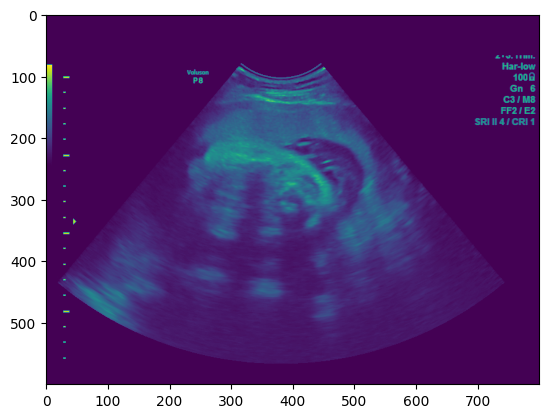

In [20]:
show_img_png(PATH)

In [25]:
PATH = '/data/kpusteln/fetal/fetal_extracted/208_3_1.png'

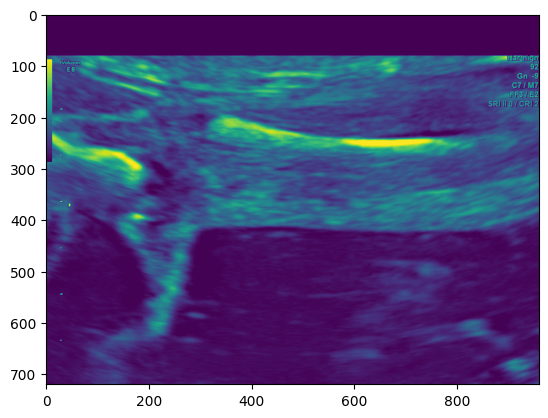

In [26]:
show_img_png(PATH)